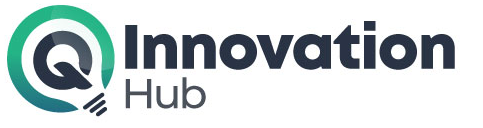

In [2]:
from IPython.core.display import Image 
Image(filename='./Q_logo.png', width='180px')

<div style="background-color:#e9eeef; border-right: 10px solid #36b38d ;" height=300 width=100%>
    <font color=#2b3444 size=8 align=left ><strong> Quantech</strong></font><br>
    <font color=#36b38d size=6 align=left ><strong> Predictive Maintenance</strong></font>
</div>
 



<div align=left>
    <font color=#2b3444 size=6 align=left ><strong>Anomaly Detection Model Training Notebook</strong></font><br>
</div>

#### The objective of this notebook is to create a Predictive Maintenance Solution based on anomaly detection to point out anomalies/irregularities in real-time data. Currently, this notebook is limited to detecting anomalies in temperature-humidity sensor readings using Autoencoders.

#### What is Predictive Maintenance and Anomaly Detection?

Predictive maintenance refers to the use of data-driven, proactive maintenance methods that are designed to analyze the condition of equipment and help predict when maintenance should be performed.
Predictive maintenance is one of the major goals of Industry 4.0 and it depends majorly on anomaly detection. Anomaly detection or outlier detection is a set of major techniques with an aim to identify anomaly patterns that deviate from normal behavior.

One of the primary tasks in building this pipeline is to have an ML Model that detects these anomalies. This notebook covers the development process of an Autoencoder model for detecting anomalies.

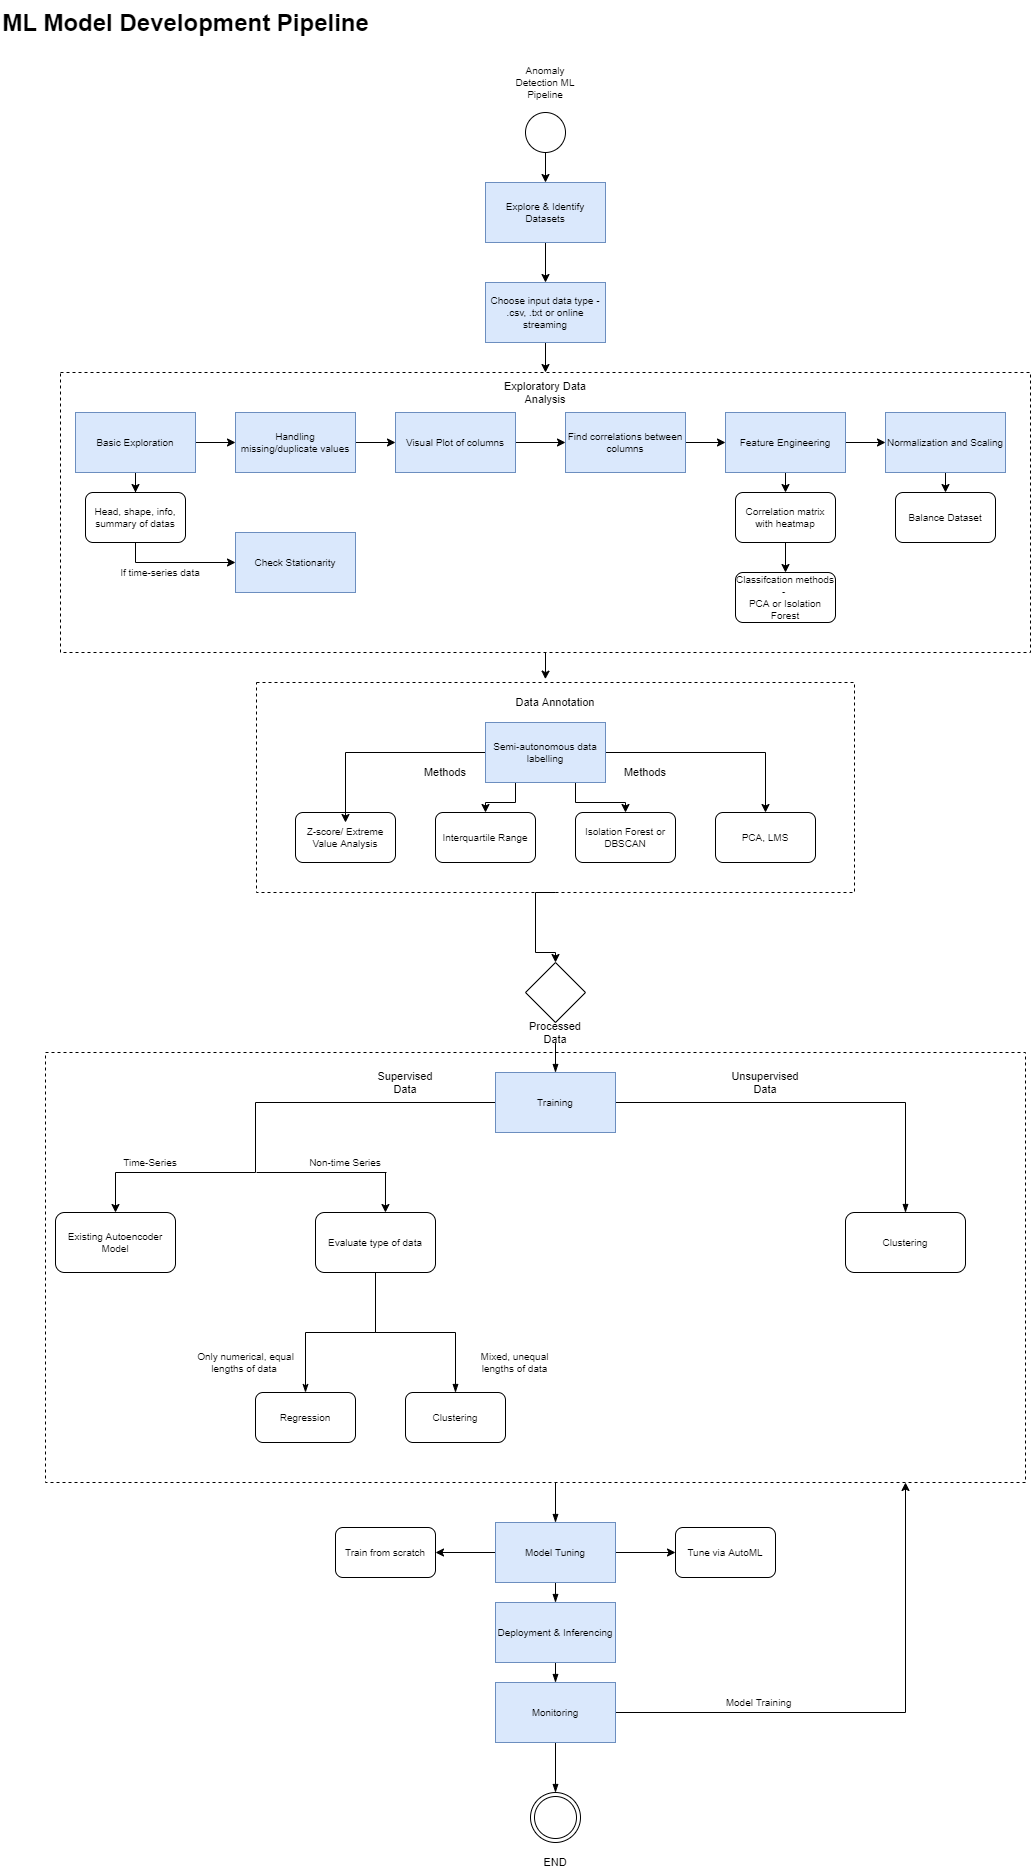

In [3]:

Image(filename='./mldevelopment.png', width='400px', height='400px')

The notebook gives an option to train with existing datasets - Temperature-humidity dataset and Credit Card Fraud Detection or to train with your own custom dataset with a model of your choice.
The following aspects of the notebook can be customised:
- Dataset : Train with existing or use your own
- Model : Train with different algorithms offered. Currently limited to only Autoencoders.
- EDA: You can choose the steps for EDA 
- Hyperparameter Tuning: Tune the model with your own hyperparameters.

### Build your model

In [4]:
import ipywidgets as widgets
import io
import logging
import pandas as pd
import statsmodels
import matplotlib
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest

In [5]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

style = {'description_width': 'initial'}

RANDOM_SEED = 42
LABELS = ["Normal", "Anomaly"]



stationarity_method =  widgets.Dropdown(
                        options=['Differencing','Transformation'],
                        value=None,
                        description='Select Method: ',
                        disabled=False,
                        style = style
                        )
def on_change_stationarity_method(change):
    with output_box:
        df = pd.read_csv('Temperature_Data.csv')
        df.timestamp = pd.to_datetime(df.Date)
        df.index = df.timestamp
        df = df.drop(columns=['Location','Date'])
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] =='Differencing':

                df['Temperature_diff'] = df['Temperature'] - df['Temperature'].shift(1)
                df['Temperature_diff'].dropna().plot()
            # adf_test(df1['Temperature_diff'])
            elif change['new'] == 'Transformation':
                print('Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform')
                transformation_selector.observe(on_change_transform)
                display(transformation_selector)


stationarity_test =  widgets.Dropdown(
                        options=['Visual Test - Temperature','Visual Test - Humidity','ADF Test for Temperature', 'ADF Test for Humidity'],
                        value=None,
                        description='Select Stationarity Test: ',
                        disabled=False,
                        style = style
                        )
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def on_change_stationarity_test(change):
    with output_box:
        df = pd.read_csv('Temperature_Data.csv')
        df.timestamp = pd.to_datetime(df.Date)
        df.index = df.timestamp
        df = df.drop(columns=['Location','Date'])
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] =='Visual Test - Temperature':
                df['Temperature'].plot(xlabel = 'Date' ,ylabel = 'Temperature degree C', title='Temperature wrt Date')
                plt.show()
                print('Graph for Temperature has upward and downward trends. It does not seem stationary, visually.')
            elif change['new'] == 'Visual Test - Humidity':
                df['Humidity'].plot(xlabel = 'Date' ,ylabel = 'Humidity RH', title='Humidity wrt Date', color="orange")
                plt.show()
                print('Humidity graph varies heavily with time. It does not seem stationary, visually.')
            elif change['new'] =='ADF Test for Temperature':
                adf_test(df['Temperature'])
                print('\nIf the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary).\nWhen the test statistic is greater than the critical value,\nwe fail to reject the null hypothesis (which means the series is not stationary).\n\nAbove, the test statistic > critical value,\nwhich implies that the series is not stationary.\nThis confirms our original observation which we initially saw in the visual test.')
            elif change['new'] =='ADF Test for Humidity':
                adf_test(df['Humidity'])
                print('\nIf the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary).\nWhen the test statistic is greater than the critical value,\n we fail to reject the null hypothesis (which means the series is not stationary).\n\nAbove, the test statistic > critical value,\nwhich implies that the series is not stationary.\nThis confirms our original observation which we initially saw in the visual test.')

    #         else:
    #             pass
        else:
            pass
    
transformation_selector = widgets.Dropdown(
        options=['Log Transform', 'SquareRoot Transform'],
        value=None,
        description='',
        disabled=False
)

def on_change_transform(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            print('\nChoose Transformation Method: ')
            if change['new'] == 'Log Transform':
                df['Temperature_log'] = np.log(df['Temperature'])
                df['Temperature_log_diff'] = df['Temperature_log'] - df['Temperature_log'].shift(1)
                df = df.dropna()
                df['Temperature_log_diff'].plot()
                plt.show()
            elif change['new'] == 'SquareRoot Transform':
                df['Temperature_sqrt'] = np.sqrt(df['Temperature'])
                df['Temperature_sqrt_diff'] = df1['Temperature_sqrt'] - df1['Temperature_sqrt'].shift(1)
                df = df.dropna()
                df['Temperature_sqrt_diff'].plot()
                plt.show() 
eda_options =  widgets.Dropdown(
                        options=['Data Shape','Column Info', 'Column Stats', 'Null Values(if any)'],
                        value=None,
                        description='Select: ',
                        disabled=False
                        )

def on_change_eda_temp(change):
    with output_box:
        df = pd.read_csv('Temperature_Data.csv')
        if change['type'] == 'change' and change['name'] == 'value':
       
            if change['new'] =='Data Shape':
                print('Displaying Data Shape')
                display(df.shape)
            elif change['new'] == 'Column Info':
                print('Displaying Info for all Columns.')
                display(df.info)
            elif change['new'] =='Column Stats':
                print('Displaying Stats for all Columns.')
                display(df.describe)
            elif change['new'] =='Null Values(if any)':
                print('Displaying null-values per column if any.')
                display(df.isnull().sum())
        print('\nTest for Stationarity')
        print('\nWhat is Stationarity?')
        print('\nTime series is different from more traditional classification and regression predictive modeling problems. The temporal structure adds an order to the observations.\n This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.\n In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time.\n It does not mean that the series does not change over time,\n just that the way it changes does not itself change over time.')
        stationarity_test.observe(on_change_stationarity_test)
        display(stationarity_test)
        
        print('\n\n\n----Implementing Stationarity----')
        print('Strict Stationarity:\nA strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time.\n The aim is to convert a non-stationary series into a strict stationary series for making predictions.')
        print('Trend Stationary:\nA series that has no unit root but exhibits a trend is referred to as a trend stationary series.\n Once the trend is removed, the resulting series will be strict stationary.\n The KPSS test classifies a series as stationary on the absence of unit root.\n This means that the series can be strict stationary or trend stationary.')
        stationarity_method.observe(on_change_stationarity_method)
        display(stationarity_method)

def on_change_eda_fraud(change):
    with output_box:
        df = pd.read_csv('creditcard.csv')
        if change['type'] == 'change' and change['name'] == 'value':
       
            if change['new'] =='Data Shape':
                print('Displaying Data Shape')
                display(df.shape)
            elif change['new'] == 'Column Info':
                print('Displaying Info for all Columns.')
                display(df.info)
            elif change['new'] =='Column Stats':
                print('Displaying Stats for all Columns.')
                display(df.describe)
            elif change['new'] =='Null Values(if any)':
                print('Displaying null-values per column if any.')
                display(df.isnull().sum())

def on_change_eda_power(change):
    with output_box:
        df = pd.read_csv('powerconsumption.csv')
        if change['type'] == 'change' and change['name'] == 'value':
       
            if change['new'] =='Data Shape':
                print('Displaying Data Shape')
                display(df.shape)
            elif change['new'] == 'Column Info':
                print('Displaying Info for all Columns.')
                display(df.info)
            elif change['new'] =='Column Stats':
                print('Displaying Stats for all Columns.')
                display(df.describe)
            elif change['new'] =='Null Values(if any)':
                print('Displaying null-values per column if any.')
                display(df.isnull().sum())    
                
                
def on_change_eda_wafer(change):
    with output_box:
        df = pd.read_csv('wafer.csv')
        if change['type'] == 'change' and change['name'] == 'value':
       
            if change['new'] =='Data Shape':
                print('Displaying Data Shape')
                display(df.shape)
            elif change['new'] == 'Column Info':
                print('Displaying Info for all Columns.')
                display(df.info)
            elif change['new'] =='Column Stats':
                print('Displaying Stats for all Columns.')
                display(df.describe)
            elif change['new'] =='Null Values(if any)':
                print('Displaying null-values per column if any.')
                display(df.isnull().sum())
 


        

    
                
choose_eda_wafer_select = widgets.Dropdown(
                            options = ['Anomalous Data','Normal Data'],
                            value=None,
                            description='Select Data Class: ',
                            disabled=False,
                            style= style
                            ) 

def select_eda_wafer(change):
    with output_box:
        df = pd.read_csv('wafer.csv')
        print('The dataset has already been classified into normal and anomalous data which can be determined by the Class column.\n If Class = 0, the datapoint is normal if Class = 1, datapoint is anomalous.')
        plt.hist(df["Class"])
        plt.xlabel("Class")
        plt.ylabel("Count");
        plt.title("Data distribution wrt Class")
        plt.show()
        if change['type'] == 'change' and change['name'] == 'value':
       
            if change['new'] =='Anomalous Data':
                print('Displaying info about anomalous datapoints\n\n')
                display(df[df['Class']==0].describe())
            elif change['new'] == 'Normal Data':
                print('Displaying info about normal datapoints\n\n')
                display(df[df['Class']==1].describe())
                
            
                
choose_feature_wafer = widgets.Dropdown(
                            options = ['Correlation','Chi2', 'Extra Trees Classifier'],
                            value=None,
                            description='Select Method: ',
                            disabled=False,
                            style= style
                            )             
                           
def feature_importance_wafer(change):
     with output_box:
        df = pd.read_csv('wafer.csv')
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] =='Correlation':
                print('Top 10 highest Correlated features with respect to class.')
                cor = dataset.corr()
                display(cor.nlargest(11, ['Class']))
            elif change['new'] == 'Chi2':
                print('Top 10 highest contributing features as per the Chi2 method.')
                raw_data = df.values
                y = raw_data[:, -1]
                x = raw_data[:, 0:-1]
                bestfeatures=SelectKBest(score_func=chi2,k=10)
                fit=bestfeatures.fit(x,y)
                dfScores=pd.DataFrame(fit.scores_)
                dfcolumns=pd.DataFrame(dataset.columns)
                featureScores=pd.concat([dfcolumns,dfScores],axis=1)
                featureScores.columns=['Feature','Score']
                display(featureScores.sort_values(by=['Score'], ascending=[False]).head(10))
                
            elif change['new'] =='Extra Trees Classifier':
                etcmodel = ExtraTreesClassifier()
                etcmodel.fit(x,y)
                print(etcmodel.feature_importances_)
                print('Top 10 features according to Extra Trees')
                Feature_importance=pd.Series(etcmodel.feature_importances_,index=dataset.columns[:-1])
                Feature_importance.nlargest(10).plot(kind='barh')
                
                

dataset_selector = widgets.RadioButtons(
 
    options=['Train with existing dataset', 'Train with custom dataset'],
    value=None,
    description='Select Dataset: ',
    disabled=False,
    style = style
)
existingdata =  widgets.Dropdown(
                        options=['Temperature-Humidity Dataset', 'Credit Card Fraud Dataset', 'Power Consumption Dataset', 'Wafer Manufacturing Dataset'],
                        value=None,
                        description='Select Dataset: ',
                        disabled=False,
                        style = style
    
                        )
choose_model_temp = widgets.Dropdown(
                            options = ['Autoencoder','XGBoost'],
                            value=None,
                            description='Select Model: ',
                            disabled=False,
                            style= style
                            )
#dropdown for power consumption models
choose_model_power = widgets.Dropdown(
                            options = ['Autoencoder','Autoencoder LSTM'],
                            value=None,
                            description='Select Model: ',
                            disabled=False,
                            style= style
                            )
choose_model_fraud = widgets.Dropdown(
                            options = ['Autoencoder'],
                            value=None,
                            description='Select Model: ',
                            disabled=False,
                            style= style
                            )
choose_model_wafer = widgets.Dropdown(
                            options = ['PCA','Isolation Forest'],
                            value=None,
                            description='Select Model: ',
                            disabled=False,
                            style= style)
def on_change_model_wafer(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == 'PCA':
                print('PCA is an established technique in machine learning. Its frequently used in exploratory data analysis because it reveals the inner structure of the data and explains the variance in the data.')

                print('PCA works by analyzing data that contains multiple variables. It looks for correlations among the variables and determines the combination of values that best captures differences in outcomes. These combined feature values are used to create a more compact feature space called the principal components.')
                print('\nSelect steps for EDA: ')
                eda_options.observe(on_change_eda_wafer)
                display(eda_options)
                
                print('Select Data Class to analyse: ')
                choose_eda_wafer_select.observe(select_eda_wafer)
                display(choose_eda_wafer_select)
                
                print('Feature Importance: \n\n')
                print('Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.\n\n')
                choose_feature_wafer.observe(feature_importance_wafer)
                display(choose_feature_wafer)
                
                
                
                
            if change['new'] == 'Isolation Forest':
                print('Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.\n\n')
                print('In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations')
#                 print('PCA works by analyzing data that contains multiple variables. It looks for correlations among the variables and determines the combination of values that best captures differences in outcomes. These combined feature values are used to create a more compact feature space called the principal components.')
                print('\nSelect steps for EDA: ')
                eda_options.observe(on_change_eda_wafer)
                display(eda_options)
            
                print('Select Data Class to analyse: ')
                choose_eda_wafer_select.observe(select_eda_wafer)
                display(choose_eda_wafer_select)
def on_change_model_fraud(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == 'Autoencoder':
                print('AutoEncoder is a generative unsupervised deep learning algorithm used\n for reconstructing high-dimensional input data using a neural network with a narrow\n bottleneck layer in the middle which contains the latent representation of the input data.')
                print('\n---Anomaly Detecting using Autoencoders----\n')
                print('During the training, input only normal datapoints to the Encoder.\n The bottleneck layer will learn the latent representation of the normal input data.\nThe Decoder will use the bottleneck layers output to reconstruct the normal datapoints of the original input data.\nAn anomalous datapoint will be different from a normal datapoint. The Autoencoder will have trouble reconstructing the anomalous datapoint, and hence the reconstruction error will be high.\nYou can flag a new datapoint is anomalous based on a specified threshold value for the reconstruction error')
                Image(filename='./autoencoder.png')
                print('\nSelect steps for EDA: ')
                eda_options.observe(on_change_eda_fraud)
                display(eda_options)
##dropdown for power consumption model selection
def on_change_model_power(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == 'Autoencoder':
                print('AutoEncoder is a generative unsupervised deep learning algorithm used\n for reconstructing high-dimensional input data using a neural network with a narrow\n bottleneck layer in the middle which contains the latent representation of the input data.')
                print('\n---Anomaly Detecting using Autoencoders----\n')
                print('During the training, input only normal datapoints to the Encoder.\n The bottleneck layer will learn the latent representation of the normal input data.\nThe Decoder will use the bottleneck layers output to reconstruct the normal datapoints of the original input data.\nAn anomalous datapoint will be different from a normal datapoint. The Autoencoder will have trouble reconstructing the anomalous datapoint, and hence the reconstruction error will be high.\nYou can flag a new datapoint is anomalous based on a specified threshold value for the reconstruction error')
                Image(filename='./autoencoder.png')
                print('\nSelect steps for EDA: ')
                eda_options.observe(on_change_eda_power)
                display(eda_options)
                
            
            
        elif change['new'] =='Autoencoder LSTM':
            print('An LSTM Autoencoder is an implementation of an autoencoder for sequence data using an Encoder-Decoder LSTM architecture.')
            print('Once fit, the encoder part of the model can be used to encode or compress sequence data that in turn may be used in data visualizations or as a feature vector input to a supervised learning model.')
            Image(filename='./autoencoder.png')
            eda_options.observe(on_change_eda)
            display(eda_options)

def on_change_model_temp(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == 'Autoencoder':
                print('AutoEncoder is a generative unsupervised deep learning algorithm used\n for reconstructing high-dimensional input data using a neural network with a narrow\n bottleneck layer in the middle which contains the latent representation of the input data.')
                print('\n---Anomaly Detecting using Autoencoders----\n')
                print('During the training, input only normal datapoints to the Encoder.\n The bottleneck layer will learn the latent representation of the normal input data.\nThe Decoder will use the bottleneck layers output to reconstruct the normal datapoints of the original input data.\nAn anomalous datapoint will be different from a normal datapoint. The Autoencoder will have trouble reconstructing the anomalous datapoint, and hence the reconstruction error will be high.\nYou can flag a new datapoint is anomalous based on a specified threshold value for the reconstruction error')
                Image(filename='./autoencoder.png')
                
                print('\nSelect steps for EDA: ')
                eda_options.observe(on_change_eda_fraud)
                display(eda_options)
            
        elif change['new'] =='XGBoost':
            print('!!INFO: Functionality not available at the moment. Please choose autoencoder instead')

def on_change(change):
    with output_box:
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == 'Temperature-Humidity Dataset':
                df = pd.read_csv('Temperature_Data.csv')
                with output_box:
                    print(df)
                    
#                  with output_box:
        
                    choose_model_temp.observe(on_change_model_temp)
                    display(choose_model_temp)
                    
                
          
        elif change['new'] =='Credit Card Fraud Dataset':
            df = pd.read_csv('creditcard.csv')
            with output_box:
                print('The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.')

                print('It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are Time and Amount.\n Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.\n The feature Amount is the transaction Amount,\n this feature can be used for example-dependant cost-sensitive learning.\n Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.\n\n\n')
                print(df)
                
                choose_model_fraud.observe(on_change_model_fraud)
                display(choose_model_fraud)
                
        elif change['new'] =='Power Consumption Dataset':
            df = pd.read_csv('powerconsumption.csv')
            with output_box:
                print('Given the rise of smart electricity meters and the wide adoption of electricity generation technology like solar panels, there is a wealth of electricity usage data available.\n\n')

                print('This data represents a multivariate time series of power-related variables, that in turn could be used to model and even forecast future electricity consumption.')
                print(df)
                
                choose_model_power.observe(on_change_model_power)
                display(choose_model_power)
                
        elif change['new'] =='Wafer Manufacturing Dataset':
            df = pd.read_csv('wafer.csv')
            with output_box:
                print('Semiconductors wafer manufacturing dataset information:\n\n')
                print('The giant manufacturing company need to monitor there product very often like 10 milliseconds to capture their behavior which brings in lots of information. And any defect peaces in there manufactured product will degrade the company growth. Hence it becomes very important to detect and remove such anomaly from production line. The dataset contains the collection of 1763 data(Training) with 1558features in each.\n\n\n')
#                 print('This data represents a multivariate time series of power-related variables, that in turn could be used to model and even forecast future electricity consumption.')
                print(df)
                
                choose_model_wafer.observe(on_change_model_wafer)
                display(choose_model_wafer)
            

def evaluate(button):
    with output_box:
        selection = dataset_selector.get_interact_value()
        if (selection == "Train with existing dataset"):
            print('Choose Existing Dataset: ')
#             print('!!INFO: Functionality limited to Autoencoders at the moment.')
            existingdata.observe(on_change)
            display(existingdata)
            
        # rows=10,                
        elif (selection == "Train with custom dataset"):
            print('Upload dataset with the upload button below ')
            uploader = widgets.FileUpload(
            accept='*.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
            multiple=False  # True to accept multiple files upload else False
            )
            


            display(uploader)
            print('!!INFO: Upload function disabled at the moment.')

            dataset_selector.value = None
 
my_button = widgets.Button(
     description='Next',
     disabled=False,
     button_style='info', 
     tooltip='Run',
# #     icon='play'
)
output_box = widgets.Output()
# # display(my_button, output_box)
my_button.on_click(evaluate)
left_box = widgets.VBox([dataset_selector, my_button,output_box])
widgets.HBox([left_box])